### BRSET

* [Dataset](https://physionet.org/content/brazilian-ophthalmological/1.0.0/)

* [Original Paper](https://www.medrxiv.org/content/10.1101/2024.01.23.24301660v1)

### Setup Environment:

In [1]:
import os
import pandas as pd

from src.classifiers import preprocess_data, process_labels,split_data

from src.classifiers import VQADataset
from torch.utils.data import DataLoader

from src.classifiers_cpu_metrics import train_early_fusion, train_late_fusion

In [2]:
PATH = 'Embeddings/brset/'
COLUMN = 'embeddings'

In [3]:
text_path, images_path = os.listdir(PATH)

## Get data

### Text

In [4]:
text = pd.read_csv(os.path.join(PATH, text_path))
text

,image_id,DR_ICDR,text,DR_2,DR_3,split,embeddings
0,img00001,0,"An image from the right eye of a male patient,...",0,0,train,"[-0.23097647726535797, -0.6493059992790222, 0...."
1,img00002,0,"An image from the left eye of a male patient, ...",0,0,test,"[-0.18894515931606293, -0.5165128707885742, 0...."
2,img00003,0,An image from the right eye of a female patien...,0,0,train,"[-0.6901693344116211, -0.7104458212852478, 0.5..."
3,img00004,0,An image from the left eye of a female patient...,0,0,train,"[-0.7486071586608887, -0.5078404545783997, 0.6..."
4,img00005,0,"An image from the right eye of a male patient,...",0,0,test,"[-0.5759348273277283, -0.6498719453811646, 0.7..."
...,...,...,...,...,...,...,...
16261,img16262,1,"An image from the left eye of a male patient, ...",1,1,test,"[-0.15599964559078217, -0.5760699510574341, 0...."
16262,img16263,0,"An image from the right eye of a male patient,...",0,0,train,"[-0.6628211736679077, -0.7985941767692566, 0.8..."
16263,img16264,0,"An image from the left eye of a male patient, ...",0,0,test,"[-0.710575520992279, -0.6339892745018005, 0.91..."
16264,img16265,0,"An image from the right eye of a male patient,...",0,0,train,"[0.040444035083055496, -0.4349224269390106, 0...."


### Images

In [5]:
images = pd.read_csv(os.path.join(PATH, images_path))
images.head()

,ImageName,0,1,2,3,4,5,6,7,8,...,758,759,760,761,762,763,764,765,766,767
0,img09798.jpg,-0.294193,0.390751,2.643405,0.073184,-2.890928,-1.097695,1.915230,-1.107189,0.594483,...,-1.713115,-2.014417,-2.686043,-1.798464,2.518672,0.784248,-1.113031,-2.766220,0.831086,-1.603637
1,img05580.jpg,-0.367986,0.880974,4.144483,0.404111,-2.362875,-2.483494,1.619341,-0.234326,0.339506,...,-0.264772,-1.551748,-1.696318,-2.658066,2.746640,1.296471,-0.031170,-1.991332,0.483615,-3.028327
2,img04048.jpg,-1.067095,0.447412,2.681838,-0.720095,-1.418480,-1.689153,1.293048,-0.193820,-0.901702,...,-0.383299,-2.128386,-1.460208,-1.774976,2.094109,1.960315,-1.126977,-2.039704,0.200136,-2.508668
3,img03601.jpg,0.261033,0.724737,4.302428,-0.413854,-2.100041,-1.586142,1.285109,-0.815749,-0.267234,...,-1.517937,-1.591721,-1.075221,-1.612588,2.007281,-0.389522,-0.608352,-1.712191,-0.994813,-2.560976
4,img03469.jpg,-0.669364,0.454145,1.622608,-0.313759,-0.694529,-1.980817,2.837111,0.497876,-0.563879,...,0.930517,-3.166204,-1.988941,-2.530482,1.693230,2.151035,-0.600033,-2.071379,-0.978301,-3.103351


### Merge and preprocess the datasets

In [6]:
df = preprocess_data(text, images, "image_id", "ImageName")
df.drop(columns='text', inplace=True)
df.head()

,DR_ICDR,DR_2,DR_3,split,text_1,text_2,text_3,text_4,text_5,text_6,...,image_758,image_759,image_760,image_761,image_762,image_763,image_764,image_765,image_766,image_767
0,0,0,0,train,-0.230976,-0.649306,0.351964,4.827357,-0.652423,-1.548302,...,0.353415,-2.146708,-1.749919,-1.179385,1.859870,2.456600,-0.001963,-1.731499,0.635826,-2.967020
1,0,0,0,test,-0.188945,-0.516513,0.458152,4.739528,-0.524881,-1.532104,...,-0.184760,-0.907411,-2.038369,-1.021670,1.608807,1.900826,-0.817061,-1.813032,0.369190,-2.460825
2,0,0,0,train,-0.690169,-0.710446,0.562674,4.909813,-0.266062,-1.765767,...,-0.754568,-1.555292,-2.267442,-2.331255,2.976459,-0.276913,-0.815998,-0.846560,0.259764,-1.921576
3,0,0,0,train,-0.748607,-0.507840,0.673932,4.859914,-0.071180,-1.733303,...,-0.992413,-1.933622,-1.661158,-1.502459,2.131441,0.620160,-0.455107,-1.403641,0.617730,-2.241285
4,0,0,0,test,-0.575935,-0.649872,0.722284,5.002320,-0.277846,-1.737345,...,-0.895002,-1.292191,-1.858146,-1.470159,2.455127,1.181771,-0.773389,-1.061603,-0.579806,-2.569620


## Data Perparation

In [7]:
# Split the data
train_df, test_df = split_data(df)

# Select features and labels vectors
text_columns = [column for column in df.columns if 'text' in column] #[f'text_{i}']
image_columns = [column for column in df.columns if 'image' in column] #[f'image_{i}']
label_columns = 'DR_2'


# Process and one-hot encode labels for training set
train_labels, mlb, train_columns = process_labels(train_df, col=label_columns)
test_labels = process_labels(test_df, col=label_columns, train_columns=train_columns)


train_dataset = VQADataset(train_df, text_columns, image_columns, label_columns, mlb, train_columns)
test_dataset = VQADataset(test_df, text_columns, image_columns, label_columns, mlb, train_columns)


train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=2)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False, num_workers=2)

Train Shape: (13012, 4868)
Test Shape: (3254, 4868)


### Models

In [8]:
text_input_size = len(text_columns)
image_input_size = len(image_columns)
if label_columns == 'DR_2':
    output_size = 1
else:
    output_size = len(pd.unique(train_df[label_columns]))
multilabel = False

Training Early Fusion Model:
Model Memory Usage: 2.38 MB
The number of parameters of the model are: 623105


STAGE:2024-02-06 15:51:33 66548:66548 ActivityProfilerController.cpp:312] Completed Stage: Warm Up


Epoch 1/15 - Test Accuracy: 0.9859
Epoch 1/15 - Training Time: 1.20 seconds | Inference Time: 0.34 seconds
Epoch 2/15 - Test Accuracy: 0.9828
Epoch 2/15 - Training Time: 1.34 seconds | Inference Time: 0.33 seconds
Epoch 3/15 - Test Accuracy: 0.9834
Epoch 3/15 - Training Time: 1.44 seconds | Inference Time: 0.36 seconds
Epoch 4/15 - Test Accuracy: 0.9856
Epoch 4/15 - Training Time: 1.45 seconds | Inference Time: 0.38 seconds
Epoch 5/15 - Test Accuracy: 0.9834
Epoch 5/15 - Training Time: 1.54 seconds | Inference Time: 0.37 seconds
Epoch 6/15 - Test Accuracy: 0.9849
Epoch 6/15 - Training Time: 1.48 seconds | Inference Time: 0.39 seconds
Epoch 7/15 - Test Accuracy: 0.9809
Epoch 7/15 - Training Time: 1.53 seconds | Inference Time: 0.37 seconds
Epoch 8/15 - Test Accuracy: 0.9831
Epoch 8/15 - Training Time: 1.60 seconds | Inference Time: 0.36 seconds
Epoch 9/15 - Test Accuracy: 0.9859
Epoch 9/15 - Training Time: 1.50 seconds | Inference Time: 0.39 seconds
Epoch 10/15 - Test Accuracy: 0.9849
E

STAGE:2024-02-06 15:52:04 66548:66548 ActivityProfilerController.cpp:318] Completed Stage: Collection
STAGE:2024-02-06 15:52:04 66548:66548 ActivityProfilerController.cpp:322] Completed Stage: Post Processing


-------------------------------------------------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  
                                                   Name    Self CPU %      Self CPU   CPU total %     CPU total  CPU time avg       CPU Mem  Self CPU Mem    # of Calls  
-------------------------------------------------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  
                                         training_batch         9.26%        2.210s        64.23%       15.327s       5.009ms      -3.54 Gb      -3.55 Gb          3060  
enumerate(DataLoader)#_MultiProcessingDataLoaderIter...        28.78%        6.869s        29.26%        6.982s       1.811ms       4.42 Gb       4.42 Gb          3855  
                              Optimizer.step#AdamW.step         5.01%        1.196s        20.67%        4.932s       1.612ms       4.75 Mb     -14.01

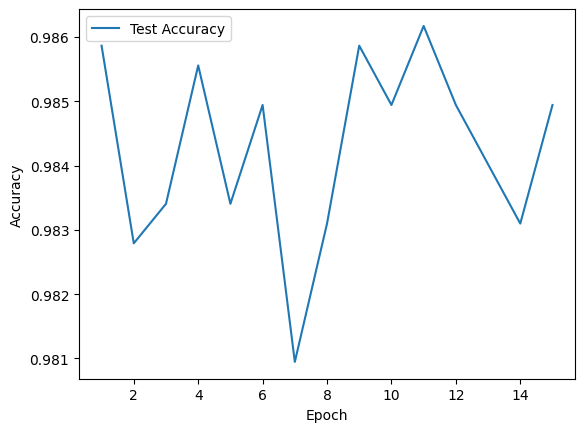

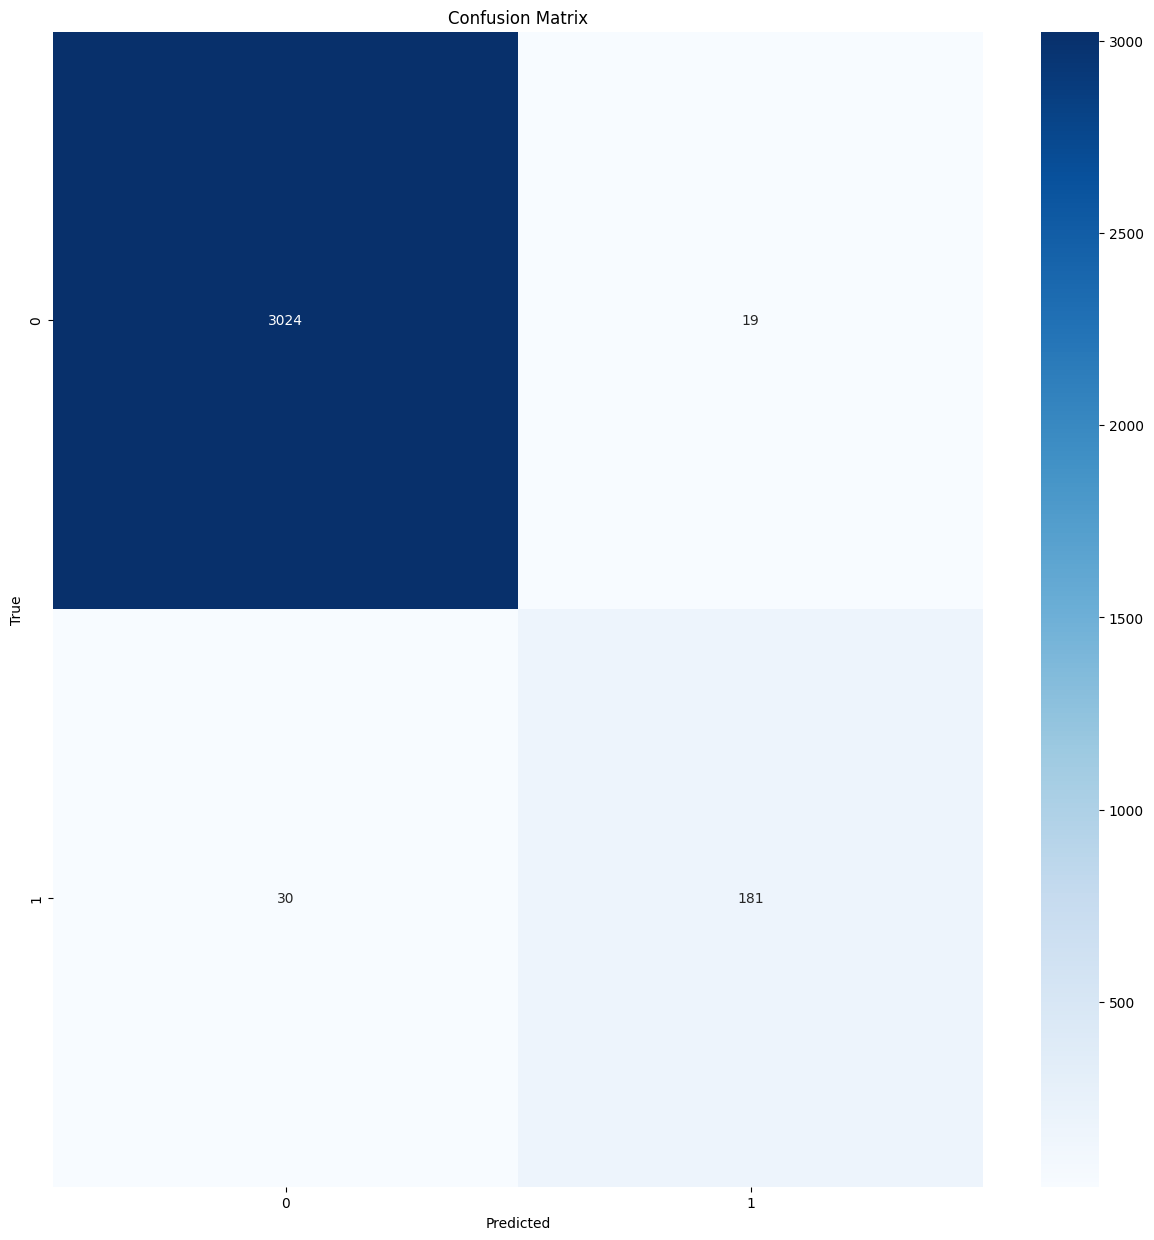

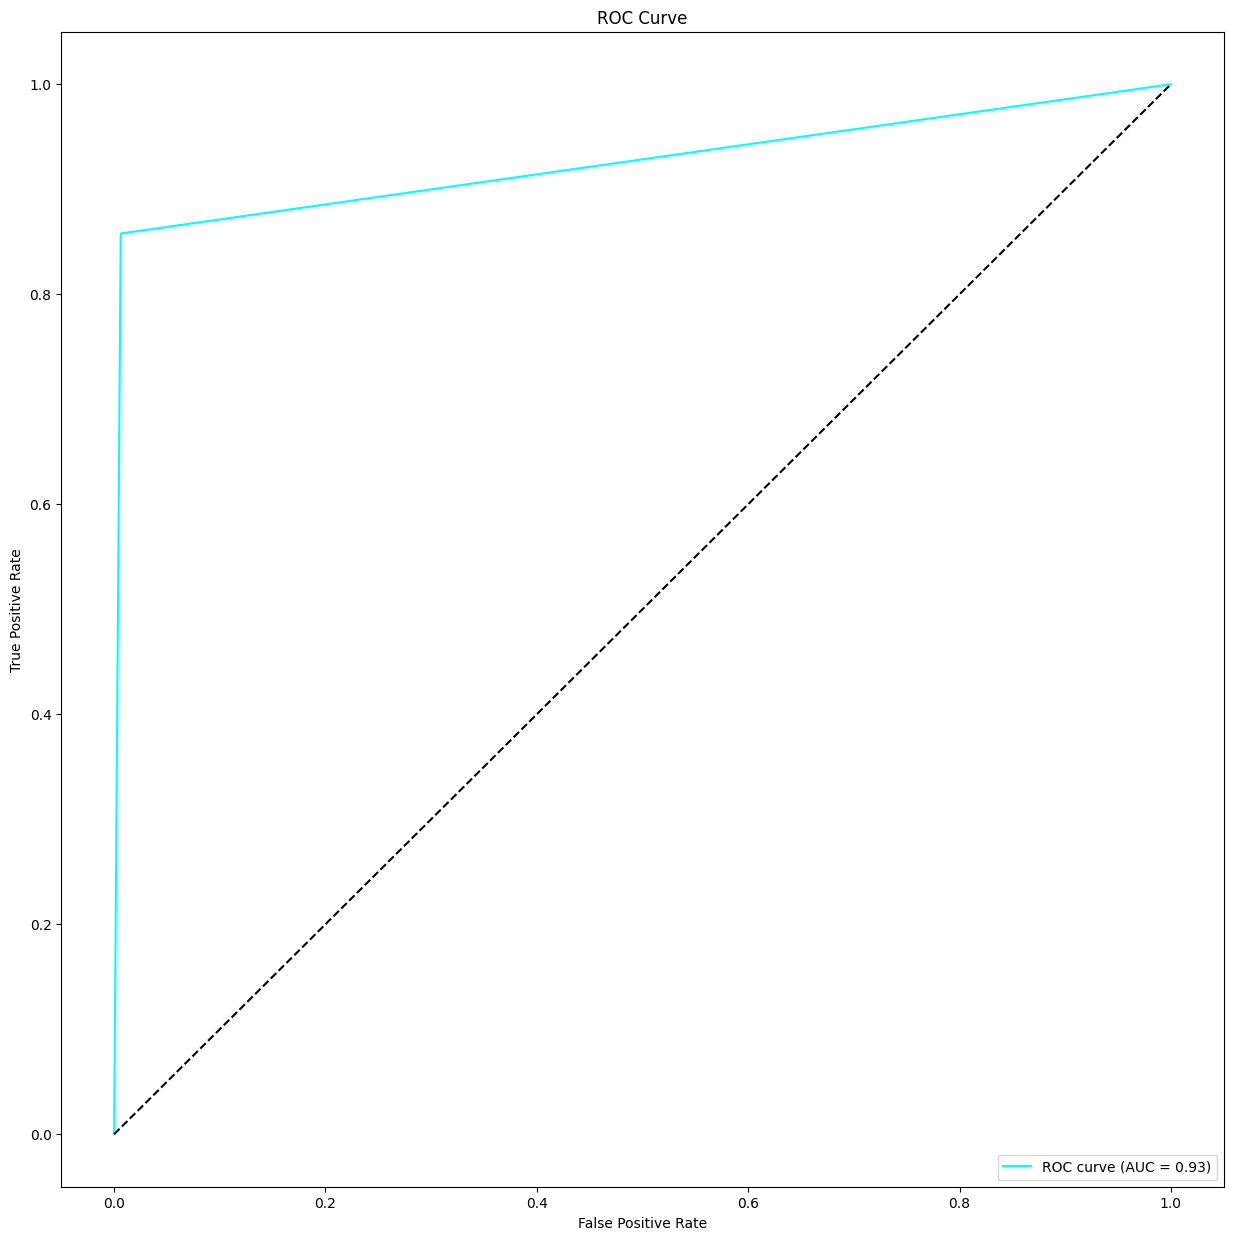

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      3043
         1.0       0.91      0.86      0.88       211

    accuracy                           0.98      3254
   macro avg       0.95      0.93      0.94      3254
weighted avg       0.98      0.98      0.98      3254



In [9]:
# Train early fusion model
print("Training Early Fusion Model:")
train_early_fusion(train_loader, test_loader, text_input_size, image_input_size, output_size, num_epochs=15, multilabel=multilabel, report=True)

Training Late Fusion Model:
Model Memory Usage: 1.19 MB
The number of parameters of the model are: 311809


STAGE:2024-02-06 15:54:20 66548:66548 ActivityProfilerController.cpp:312] Completed Stage: Warm Up


Epoch 1/15 - Test Accuracy: 0.9840
Epoch 1/15 - Training Time: 1.68 seconds | Inference Time: 0.52 seconds
Epoch 2/15 - Test Accuracy: 0.9840
Epoch 2/15 - Training Time: 1.68 seconds | Inference Time: 0.53 seconds
Epoch 3/15 - Test Accuracy: 0.9776
Epoch 3/15 - Training Time: 1.79 seconds | Inference Time: 0.55 seconds
Epoch 4/15 - Test Accuracy: 0.9828
Epoch 4/15 - Training Time: 1.64 seconds | Inference Time: 0.53 seconds
Epoch 5/15 - Test Accuracy: 0.9852
Epoch 5/15 - Training Time: 1.58 seconds | Inference Time: 0.51 seconds
Epoch 6/15 - Test Accuracy: 0.9868
Epoch 6/15 - Training Time: 1.55 seconds | Inference Time: 0.54 seconds
Epoch 7/15 - Test Accuracy: 0.9871
Epoch 7/15 - Training Time: 1.58 seconds | Inference Time: 0.53 seconds
Epoch 8/15 - Test Accuracy: 0.9846
Epoch 8/15 - Training Time: 1.90 seconds | Inference Time: 0.51 seconds
Epoch 9/15 - Test Accuracy: 0.9828
Epoch 9/15 - Training Time: 1.74 seconds | Inference Time: 0.54 seconds
Epoch 10/15 - Test Accuracy: 0.9843
E

STAGE:2024-02-06 15:54:58 66548:66548 ActivityProfilerController.cpp:318] Completed Stage: Collection
STAGE:2024-02-06 15:54:58 66548:66548 ActivityProfilerController.cpp:322] Completed Stage: Post Processing


-------------------------------------------------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  
                                                   Name    Self CPU %      Self CPU   CPU total %     CPU total  CPU time avg       CPU Mem  Self CPU Mem    # of Calls  
-------------------------------------------------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  
                                         training_batch        11.56%        2.897s        66.97%       16.787s       4.389ms      -4.42 Gb      -4.42 Gb          3825  
enumerate(DataLoader)#_MultiProcessingDataLoaderIter...        32.57%        8.165s        32.99%        8.270s       2.145ms       4.42 Gb       4.42 Gb          3855  
                              Optimizer.step#AdamW.step         6.66%        1.670s        29.82%        7.475s       2.443ms       2.38 Mb      -7.04

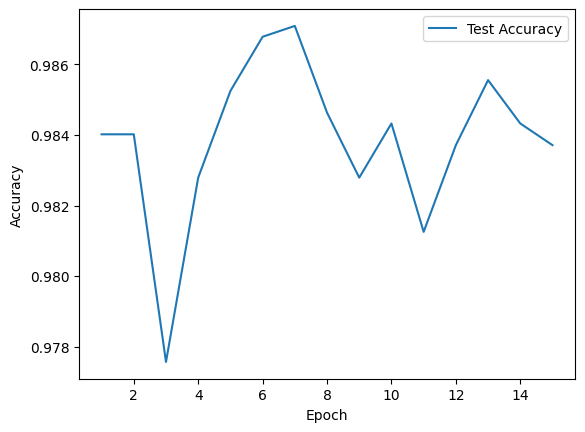

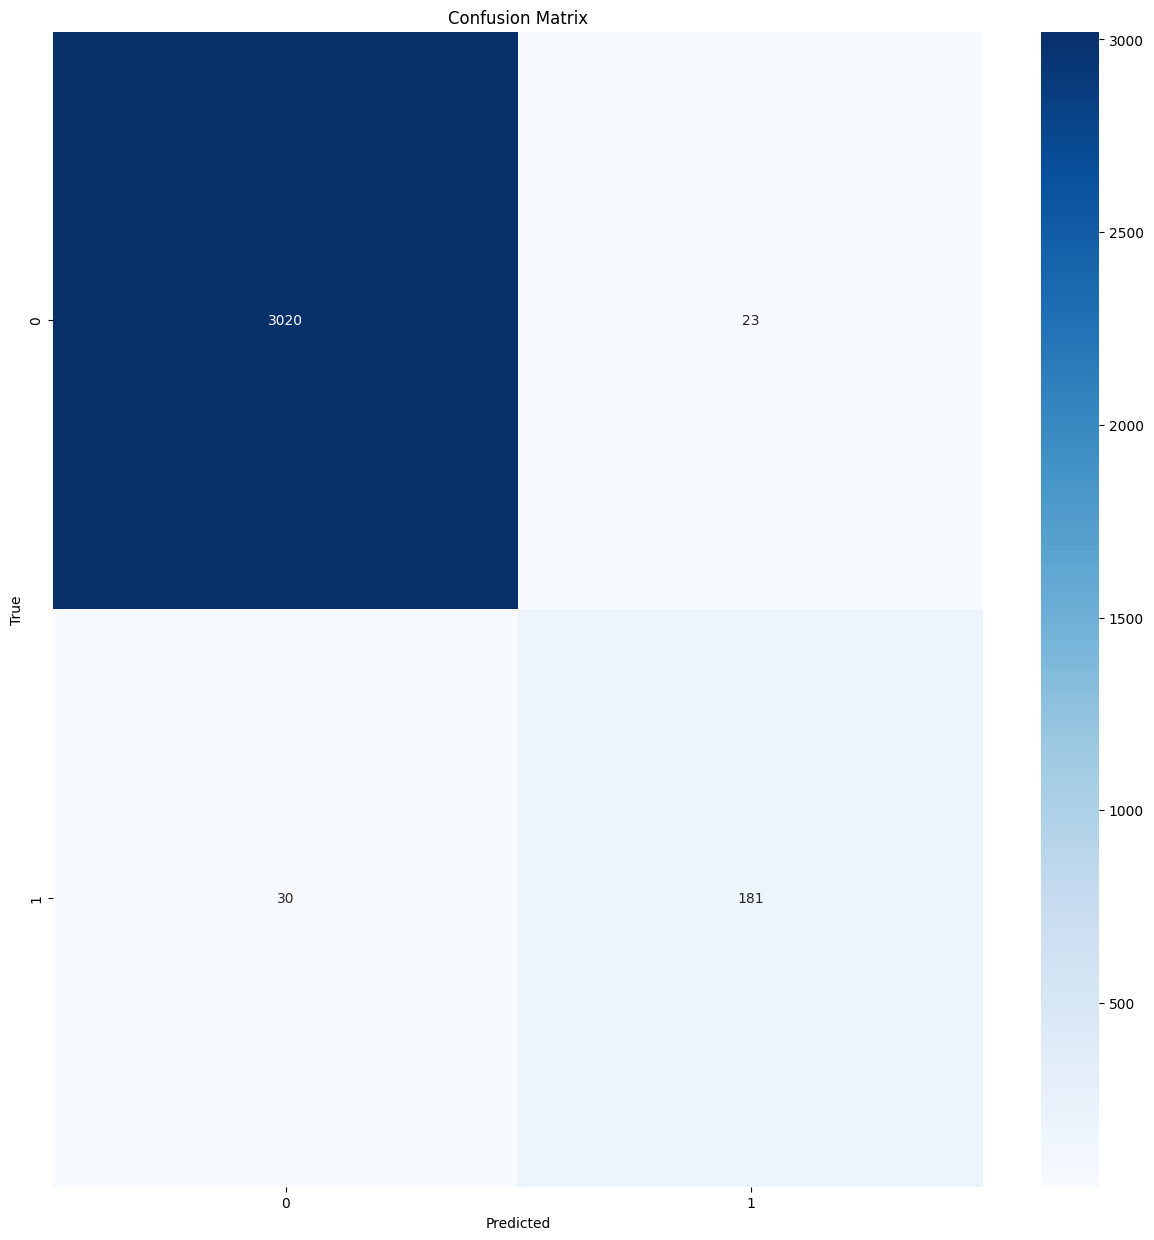

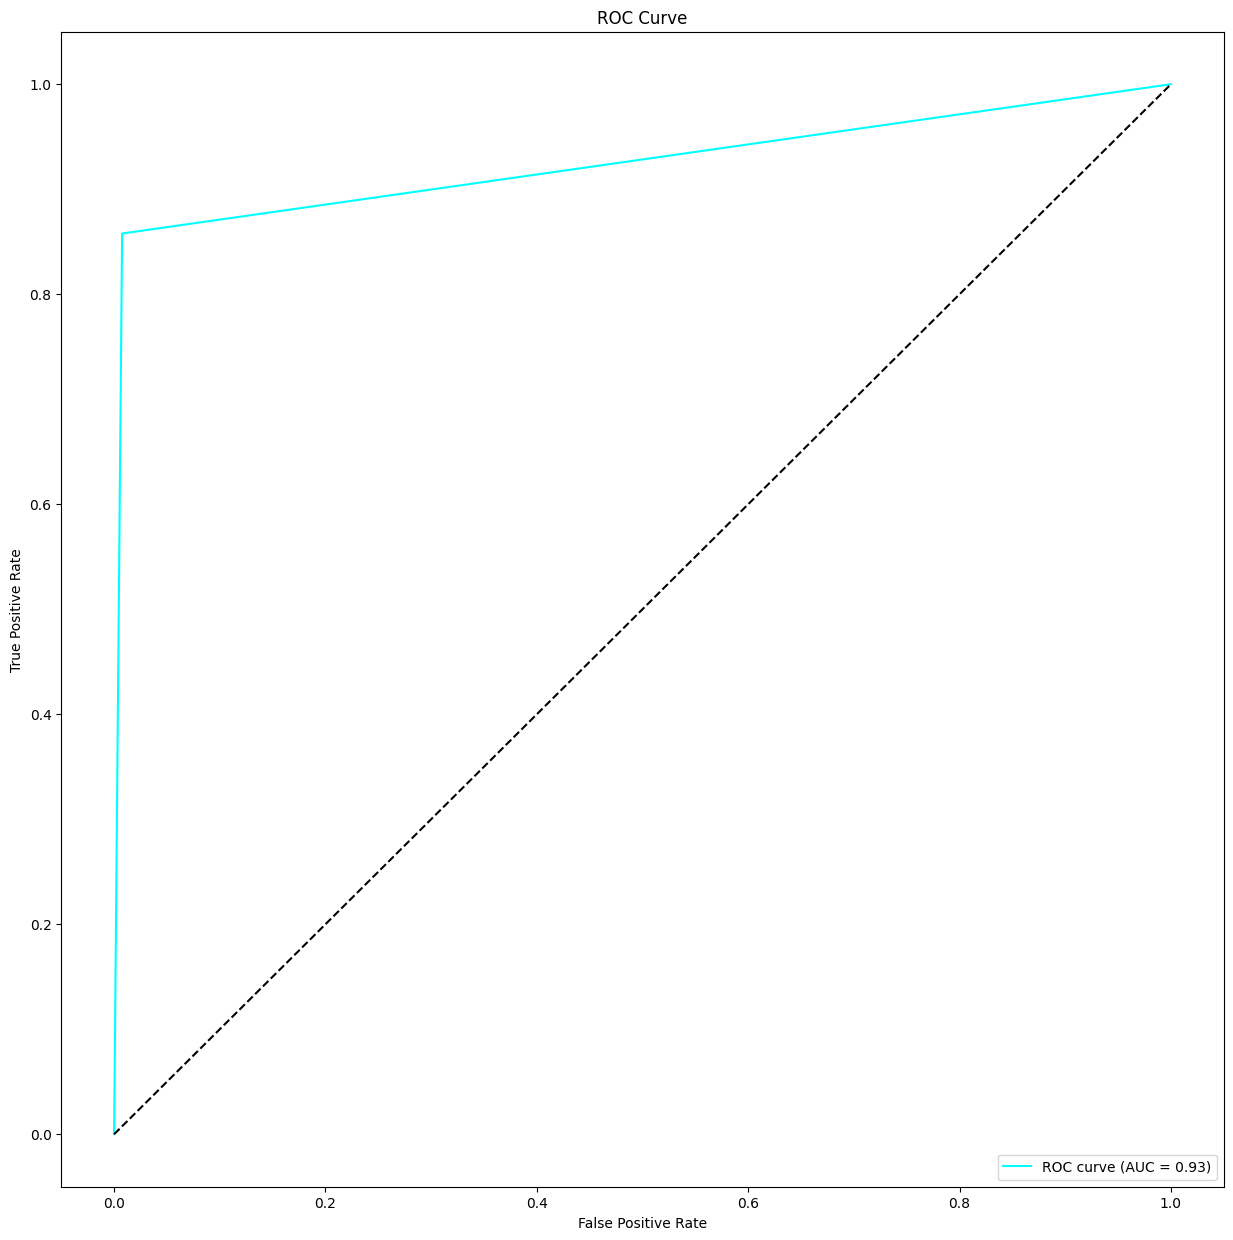

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      3043
         1.0       0.89      0.86      0.87       211

    accuracy                           0.98      3254
   macro avg       0.94      0.93      0.93      3254
weighted avg       0.98      0.98      0.98      3254



In [10]:
# Train late fusion model
print("Training Late Fusion Model:")
train_late_fusion(train_loader, test_loader, text_input_size, image_input_size, output_size, num_epochs=15, multilabel=multilabel, report=True)